## Heart disease is a classification problem 

In [1]:
#import everything we need for this model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluators
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import recall_score,f1_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

In [2]:
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

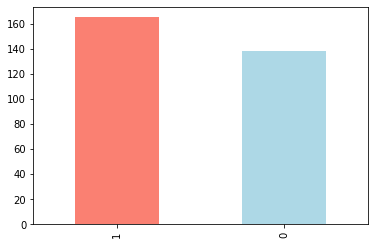

In [8]:
df['target'].value_counts().plot(kind='bar', color=['salmon','lightblue'])

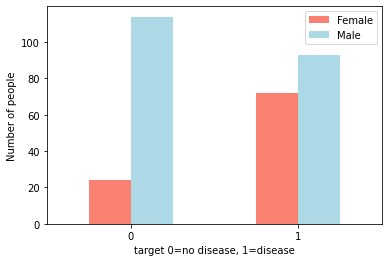

In [14]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel('target 0=no disease, 1=disease')
plt.ylabel('Number of people')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

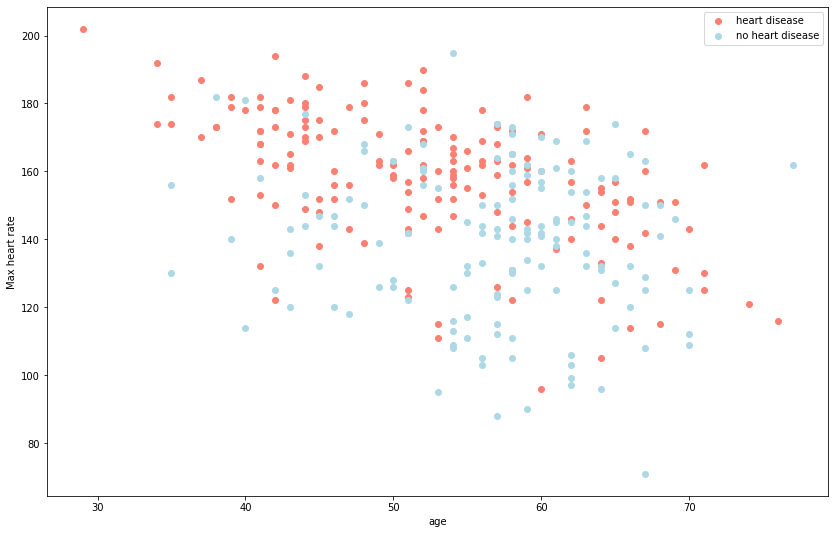

In [41]:
age_with_target_1 = df['age'][df['target']==1]
age_with_target_0 = df['age'][df['target']==0]

thalach_target_1 = df['thalach'][df['target']==1]
thalach_target_0 = df['thalach'][df['target']==0]

fig, ax =plt.subplots(figsize=(14,9))
ax.scatter(age_with_target_1,thalach_target_1, c='salmon')
ax.scatter(age_with_target_0,thalach_target_0, c='lightblue')

ax.set(xlabel="age",ylabel='Max heart rate')
ax.legend(['heart disease', 'no heart disease'])

#0r
# plt.figure(figsize=(14,9))
# plt.scatter(age_target_1,thalach_target_1,c='salmon')

#scatter plot of age heart rate vs no heart disease
# plt.scatter(age_target_0,thalach_target_0,c='lightblue');

# plt.xlabel("Age")
# plt.ylabel("Max Heart Rate(thalach)")
# plt.legend(['Disease','No-disease'])

# gives the same result

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


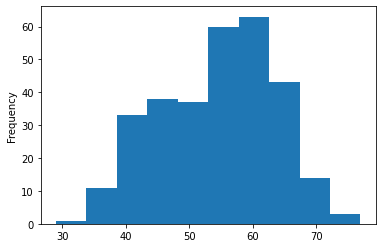

In [45]:
df['age'].plot.hist();

In [46]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


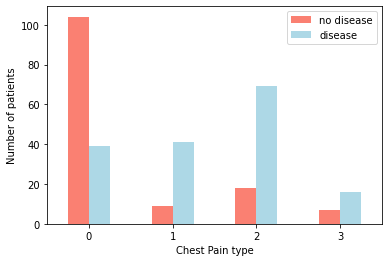

In [49]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar',color=['salmon','lightblue'])
plt.xlabel('Chest Pain type')
plt.ylabel('Number of patients')
plt.xticks(rotation=0)
plt.legend(['no disease','disease'])

In [52]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


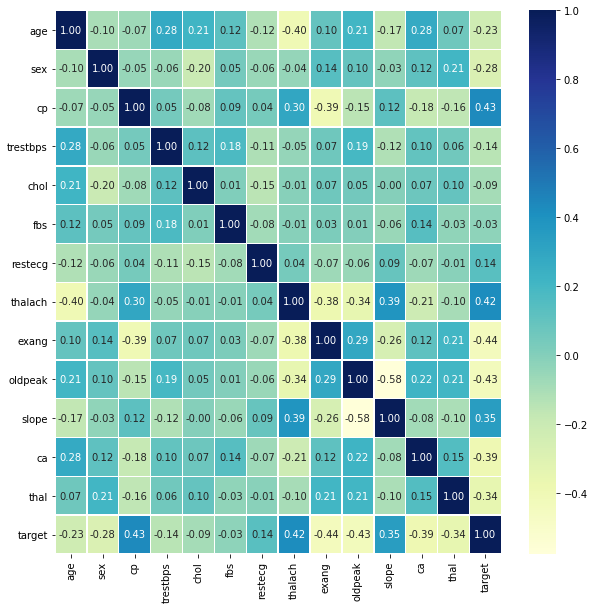

In [55]:
fig, ax =plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(),annot=True,
                fmt='.2f',
                cmap='YlGnBu',
                linewidth=.5)

# Modelling

In [56]:
#split data

X = df.drop('target',axis=1)
y = df['target']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [57]:
models = {'Logistic Regression':LogisticRegression(),
          'KNeighbours classifier':KNeighborsClassifier(),
          'Random Forest Classifier':RandomForestClassifier()}
def fit_and_score(model,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    model_score={}
    for model_name, model in models.items():
        model.fit(X_train,y_train)
        model_score[model_name] = model.score(X_test,y_test)
    return model_score   

In [58]:
model_score = fit_and_score(models, X_train,X_test,y_train, y_test)
model_score

c:\users\supen\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNeighbours classifier': 0.6721311475409836,
 'Random Forest Classifier': 0.8360655737704918}

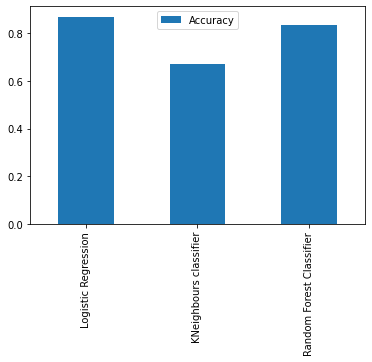

In [66]:
model_comp = pd.DataFrame(model_score, index=['Accuracy'])
model_comp.T.plot.bar();

In [69]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_preds = log_reg.predict(X_test)
y_preds

c:\users\supen\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

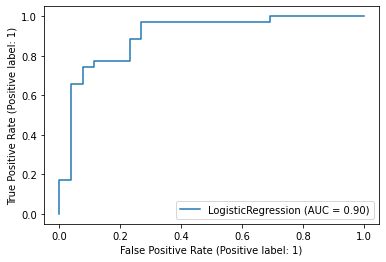

In [70]:
plot_roc_curve(log_reg,X_test,y_test)

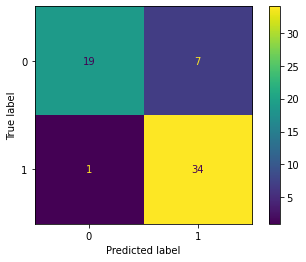

In [72]:
plot_confusion_matrix(log_reg,X_test,y_test)